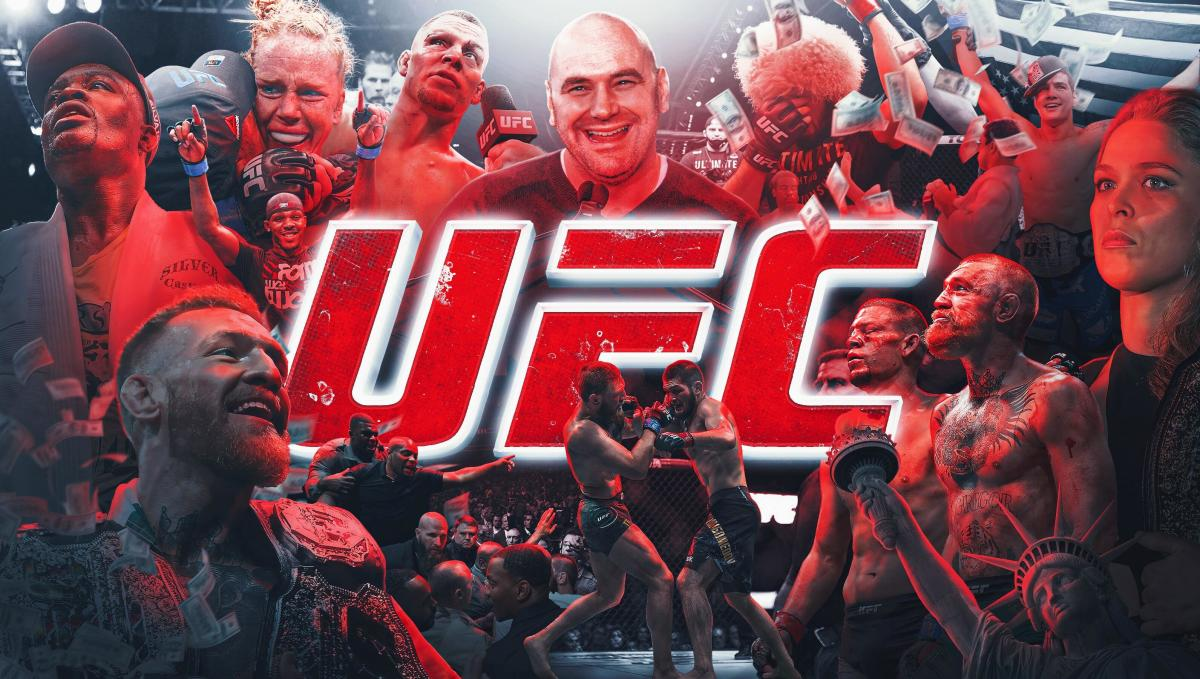

### As a big fan of UFC and someone who has actively trained in kickboxing, I have a deep appreciation for the intricacies of mixed martial arts. My passion for the sport, combined with my experience in kickboxing, motivates me to delve deeper into UFC data to uncover the factors that influence fight outcomes. I aim to combine my knowledge of combat sports with data analysis to bring actionable insights that could not only help fighters improve their performance but also enhance the fan experience. By understanding the dynamics behind successful techniques, fighter attributes, and strategies, I hope to contribute to the growing intersection of sports and data analytics, providing valuable perspectives for both athletes and fans alike.

- <a href='#1'>1. Introduction</a>  
- <a href='#2'>2. Loading libraries and retrieving data</a>
- <a href='#3'>3. Understanding the Data</a>
- <a href='#4'>4. Missing Values</a>
- <a href='#5'>5.  Data Visualization</a>


# <a id='1'>1. Introduction</a>

**Background**

Mixed martial arts (MMA) is a full-contact combat sport that allows striking and grappling, both standing and on the ground, using techniques from other combat sports and martial arts. The Ultimate Fighting Championship (UFC) is an American mixed martial arts organization based in Las Vegas, Nevada and is the largest MMA promotion in the world and features the top-ranked fighters of the sport. Based in the United States, the UFC produces events worldwide that showcase twelve weight divisions and abide by the Unified Rules of Mixed Martial Arts. This is a highly unpredictable sport 

Few things we will try to visualize:

* How's Age/Height related to the outcome?
* Most popular locations in UFC?
* Most popular way to win the fight?
* Comparing techniques used by fighters

****
# <a id='2'>2. Loading libraries and retrieving data</a>

Not all python capabilities are loaded to your working environment by default. We would need to import every library we are going to use. We will choose alias names to our modules for the sake of convenience (e.g. numpy --> np, pandas --> pd)

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from plotly.offline  import download_plotlyjs,init_notebook_mode,plot, iplot
import cufflinks as cf
init_notebook_mode(connected = True)
cf.go_offline()
%matplotlib inline

from plotly import tools
# import plotly.plotly as py
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.offline as offline
# Squarify for treemaps
import squarify
# Random for well, random stuff
import random
# operator for sorting dictionaries
import operator
# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')



df = pd.read_csv("UFC Fight Data.csv")
df.head(2)

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,0,0,38.0,193.0,Hounslow England,808,Amsterdam The Netherlands,Alistair Overeem,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1,0,0,36.0,172.0,"Chicago, Illinois United States",1054,"Chicago, Illinois United States",Ricardo Lamas,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red


In [12]:
# !pip install squarify

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Columns: 894 entries, BPrev to winner
dtypes: float64(876), int64(9), object(9)
memory usage: 15.8+ MB


# <a id='3'>3. Understanding the data</a>

Dataset contains list of all UFC fights since 2013 with summed up entries of each fighter's round by round record preceding that fight. Created in the attempt to predict a UFC fight winner .  Each row represents a single fight - with each fighter's previous records summed up prior to the fight. Blank stats mean its the fighter's first fight since 2013 which is where granular data for UFC fights. 

We have about 895 columns, few important columns to note:

* BPrev: Previous fights by 'Blue' fighter
* B_Age: Age of 'Blue' fighter
* B_Height: Height of 'Blue' fighter
* B_Weight: Weight of 'Blue' fighter
* B_Location: Location of 'Blue' fighter
* B_Hometown: Hometown of 'Blue fighter
* RPrev: Previous fights by 'Red' fighter
* R_Age: Age of 'Red' fighter
* R_Height: Height of 'Red' fighter
* R_Weight: Weight of 'Red' fighter
* R_Location: Location of 'Red' fighter
* R_Hometown: Hometown of 'Red fighter
* Date: Date of the fight
* winby: How did the fighter win the fight (decision, submission KO etc.)
* winner: Who was the winner of the fight?

Apart from this, dataset contains all the techniques (punch, kicks, takedowns etc.) attempted and landed by the fighters in each round. 

In [14]:
df.describe()

,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,2318.000000,2318.000000,2301.000000,2301.000000,2318.000000,2306.000000,1647.000000,1647.000000,1647.000000,1647.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,2.391286,0.744607,31.776184,177.327249,2120.001726,73.699480,0.074681,1.103825,0.577413,3.852459,...,251.411111,33.644444,64.903704,6.855556,3.977778,4.303704,12.011111,262.740741,4.381481,303.103704
std,2.539978,1.145596,4.165267,8.807620,705.089725,15.425347,0.305691,1.537946,1.049758,5.261864,...,197.588561,75.756504,100.516057,25.786323,13.039241,12.810181,39.171198,199.940529,20.941919,224.848078
min,0.000000,0.000000,20.000000,152.000000,129.000000,52.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,29.000000,172.000000,1910.250000,61.000000,0.000000,0.000000,0.000000,0.000000,...,137.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,0.000000,178.000000
50%,2.000000,0.000000,31.000000,177.000000,2230.000000,70.000000,0.000000,1.000000,0.000000,2.000000,...,222.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,258.500000,0.000000,296.500000
75%,4.000000,1.000000,35.000000,182.000000,2709.000000,84.000000,0.000000,2.000000,1.000000,5.000000,...,299.000000,34.000000,98.000000,0.000000,0.000000,0.000000,2.000000,300.000000,0.000000,364.000000
max,14.000000,10.000000,48.000000,213.000000,3196.000000,120.000000,3.000000,13.000000,8.000000,47.000000,...,1259.000000,633.000000,666.000000,144.000000,91.000000,62.000000,273.000000,1291.000000,200.000000,1473.000000


In [15]:
df.describe(include="all")

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
count,2318.000000,2318.000000,2301.000000,2301.000000,2301,2318.000000,2305,2318,2306.000000,1647.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,2282,2318
unique,NaN,NaN,NaN,NaN,724,NaN,567,949,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4
top,NaN,NaN,NaN,NaN,Rio de Janeiro Brazil,NaN,Rio de Janeiro Brazil,Kevin Lee,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
freq,NaN,NaN,NaN,NaN,46,NaN,58,11,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1111,1327
mean,2.391286,0.744607,31.776184,177.327249,NaN,2120.001726,NaN,NaN,73.699480,0.074681,...,64.903704,6.855556,3.977778,4.303704,12.011111,262.740741,4.381481,303.103704,NaN,NaN
std,2.539978,1.145596,4.165267,8.807620,NaN,705.089725,NaN,NaN,15.425347,0.305691,...,100.516057,25.786323,13.039241,12.810181,39.171198,199.940529,20.941919,224.848078,NaN,NaN
min,0.000000,0.000000,20.000000,152.000000,NaN,129.000000,NaN,NaN,52.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,29.000000,172.000000,NaN,1910.250000,NaN,NaN,61.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,0.000000,178.000000,NaN,NaN
50%,2.000000,0.000000,31.000000,177.000000,NaN,2230.000000,NaN,NaN,70.000000,0.000000,...,10.000000,0.000000,0.000000,0.000000,0.000000,258.500000,0.000000,296.500000,NaN,NaN
75%,4.000000,1.000000,35.000000,182.000000,NaN,2709.000000,NaN,NaN,84.000000,0.000000,...,98.000000,0.000000,0.000000,0.000000,2.000000,300.000000,0.000000,364.000000,NaN,NaN


In [16]:

print("Number of records : ", df.shape[0])
print("Number of Blue fighters : ", len(df.B_ID.unique()))
print("Number of Red fighters : ", len(df.R_ID.unique()))

Number of records :  2318
Number of Blue fighters :  942
Number of Red fighters :  835


In [17]:
df.isnull().sum(axis=0)

BPrev                                 0
BStreak                               0
B_Age                                17
B_Height                             17
B_HomeTown                           17
                                   ... 
R__Round5_TIP_Neutral Time         2048
R__Round5_TIP_Side Control Time    2048
R__Round5_TIP_Standing Time        2048
winby                                36
winner                                0
Length: 894, dtype: int64


# <a id='4'>4. Missing Values</a>

We oberserve there are some missing values in our data.  I know Age and Height are important features in any combat sport and they have handful of missing values. 

We will address the missing values in age and height. We can simply delete rows with missing values, but usually we would want to take advantage of as many data points as possible. Replacing missing values with zeros would not be a good idea - as age 0 will have actual meanings and that would change our data.

Therefore a good replacement value would be something that doesn't affect the data too much, such as the median or mean. the "fillna" function replaces every NaN (not a number) entry with the given input (the mean of the column in our case). Let's do this for both 'Blue' and 'Red' fighters.

In [18]:

df['B_Age'] = df['B_Age'].fillna(np.mean(df['B_Age']))
df['B_Height'] = df['B_Height'].fillna(np.mean(df['B_Height']))
df['R_Age'] = df['R_Age'].fillna(np.mean(df['R_Age']))
df['R_Height'] = df['R_Height'].fillna(np.mean(df['R_Height']))

# <a id='5'>5. Data Visualization</a>

Let's start by looking who's winning more from our dataset:



In [20]:
temp = df["winner"].value_counts()

# Create the figure
fig = go.Figure(
    data=[
        go.Pie(
            labels=temp.index,
            values=temp.values,
            hole=0.6,  # Creates the donut effect
        )
    ],
    layout=go.Layout(
        title="Winner",
        annotations=[
            {
                "font": {"size": 17},
                "showarrow": False,
                "text": "Who's winning more",
                "x": 0.5,
                "y": 0.5,
            }
        ]
    )
)

fig.show()


I trust my instincts and focus on what seems most relevant. Age is a key factor in any sport, influencing both performance and potential. By examining how Age is distributed in our dataset, we can uncover trends and insights that may help us understand the impact of age on various aspects of the sport. Lets take a closer look and see what the data reveals.

In [24]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df['B_Age'], nbinsx=20, name='B_Age', opacity=0.75, xaxis='x1'))
fig.add_trace(go.Histogram(x=df['R_Age'], nbinsx=20, name='R_Age', opacity=0.75, xaxis='x2'))
fig.update_layout(
    barmode='overlay',
    xaxis1=dict(title='B_Age', domain=[0, 0.45]),
    xaxis2=dict(title='R_Age', domain=[0.55, 1]),
    title="Histograms of B_Age and R_Age",
    height=500,
    width=900,
    template='plotly_white'
)
fig.show()


Age is important in any sport, especially in MMA, where strength, agility, and speed are key. These skills typically peak between 27 and 35 years old, which means fighters in this age range tend to have an advantage. Fighters in this group are often quicker, stronger, and more agile, increasing their chances of winning. Lets take a closer look by grouping the ages of Blue fighters who have won their fights and see if this trend holds true.

In [25]:

BAge = df.groupby(['B_Age']).count()['winner']
BlueAge = BAge.sort_values(axis=0, ascending=False)
BlueAge.head(10)

B_Age
31.0    245
32.0    224
29.0    206
30.0    187
35.0    173
34.0    171
28.0    158
33.0    156
27.0    138
36.0    106
Name: winner, dtype: int64

Most fights are typically won by fighters in their late 20s to early 30s, as this is when they generally reach their physical peak. During this time, they are at their strongest, quickest, and have the best cardiovascular fitness, all of which are crucial for winning fights. This age range is considered the prime for athletic performance, as the body has fully matured but hasn't yet started to decline. 

Fighters who are younger, particularly those in their early 20s, haven’t fully developed their strength and endurance. They may still be growing into their physical potential, and it often takes until the age of 27 or 28 before they reach their peak. While they may have energy and speed, they may lack the full physical capabilities to consistently outperform those in their prime.

On the other hand, older fighters typically experience a decline in their physical abilities as they age. They may not be able to maintain the same level of strength, speed, or cardiovascular capacity as they did in their prime years. This slower pace and reduced stamina can make it more challenging to keep up with younger, faster fighters, and they may be more likely to lose as a result. 

Understanding these trends can provide valuable insights into fight outcomes, and now, we’ll look at our data to see if this pattern is supported. Let’s start by analyzing the performance of 'Red' fighters to see if age plays a significant role in their success or failure.

In [26]:
RAge = df.groupby(['R_Age']).count()['winner']
RedAge = RAge.sort_values(axis=0, ascending=False)
RedAge.tail(10)

R_Age
43.0    12
22.0    11
23.0    10
42.0     8
44.0     5
46.0     3
48.0     2
20.0     2
21.0     1
45.0     1
Name: winner, dtype: int64

It seems like this pattern is correct based on the data. Now, I’m curious about how many fighters from both the 'Red' and 'Blue' corners are under the age of 35. Since we’re seeing that fighters in their late 20s to early 30s tend to perform better, it would be interesting to see how many of the fighters in the data fit this age range. This could help us better understand if age really plays a major role in the outcomes of these fights.

In [31]:
df_B = pd.DataFrame({
    'B_Age': ['above35' if i >= 35 else 'below35' for i in df.B_Age]
})

df_R = pd.DataFrame({
    'R_Age': ['above35' if i >= 35 else 'below35' for i in df.R_Age]
})

# Create the Blue fighters' bar plot
blue_age_count = df_B['B_Age'].value_counts()
blue_trace = go.Bar(
    x=blue_age_count.index,
    y=blue_age_count.values,
    name='Blue Fighters',
    marker=dict(color='blue')
)

# Create the Red fighters' bar plot
red_age_count = df_R['R_Age'].value_counts()
red_trace = go.Bar(
    x=red_age_count.index,
    y=red_age_count.values,
    name='Red Fighters',
    marker=dict(color='red')
)

# Create subplots
fig = go.Figure()
fig.add_trace(blue_trace)
fig.add_trace(red_trace)
fig.update_layout(
    barmode='group',
    title="Age Distribution of Fighters",
    xaxis_title="Age Group",
    yaxis_title="Number of Fighters",
    showlegend=True,
    width=800,
    height=500
)
fig.show()


Surprisingly, most fighters in MMA are under 35 years old. This is because MMA is a physically demanding sport, and as fighters get older, their bodies can suffer from long-lasting injuries. The intense training, fighting, and constant pressure take a toll, which can make it harder for older fighters to keep up or recover.

Finally, let's take a closer look at the mean difference, which is the average difference between two groups or sets of numbers. This will help us understand how much one set of data differs from the other, on average.

In [32]:
df['Age_Difference'] = df.B_Age - df.R_Age
df[['Age_Difference', 'winner']].groupby('winner').mean()

,Age_Difference
winner,
blue,-1.789845
draw,-1.187500
no contest,-1.893579
red,0.161410


Age can have a big impact, and being younger often gives fighters an advantage. When it comes to height, it’s also important in MMA. Taller fighters usually have a longer reach, meaning they can strike from a distance without being too close to their opponent. This allows them to stay out of the danger zone where they might get hit. Let’s take a closer look at how height is spread out among fighters and how it could affect their performance in the ring.

<Axes: xlabel='R_Height', ylabel='Density'>

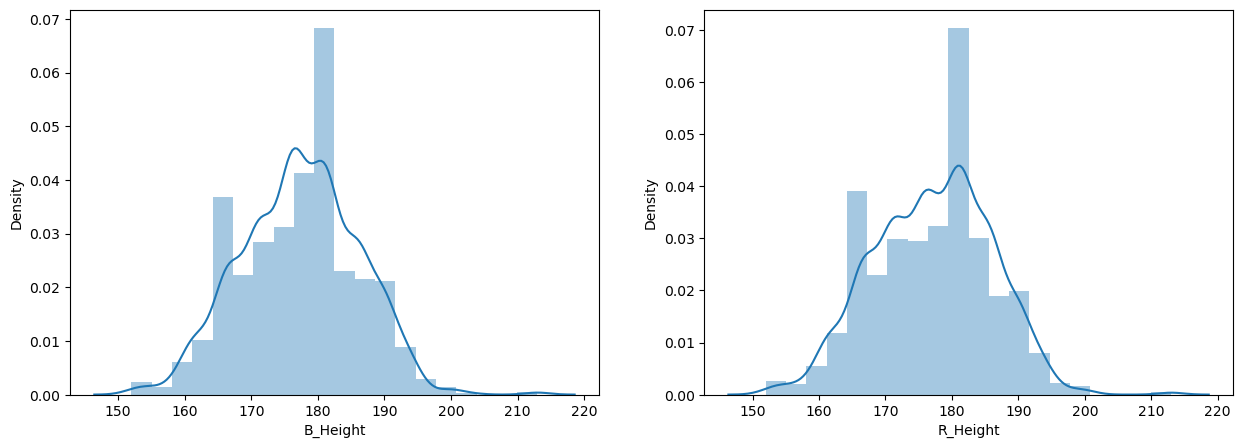

In [33]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.distplot(df.B_Height, bins = 20, ax=ax[0]) #Blue 
sns.distplot(df.R_Height, bins = 20, ax=ax[1]) #Red

In [39]:
fig = make_subplots(rows=1, cols=2, shared_yaxes=True, 
                    subplot_titles=('B_Height Distribution', 'R_Height Distribution'))

# Trace for B_Height
trace1 = go.Histogram(
    x=df['B_Height'],
    nbinsx=20,
    name='B_Height',
    marker=dict(color='blue'),
    opacity=0.7
)

# Trace for R_Height
trace2 = go.Histogram(
    x=df['R_Height'],
    nbinsx=20,
    name='R_Height',
    marker=dict(color='red'),
    opacity=0.7
)


fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.update_layout(
    title_text='Height Distributions',
    xaxis_title='Height',
    yaxis_title='Frequency',
    showlegend=False,
    height=500,
    width=1000
)
fig.show()


<Axes: xlabel='B_Height', ylabel='Density'>

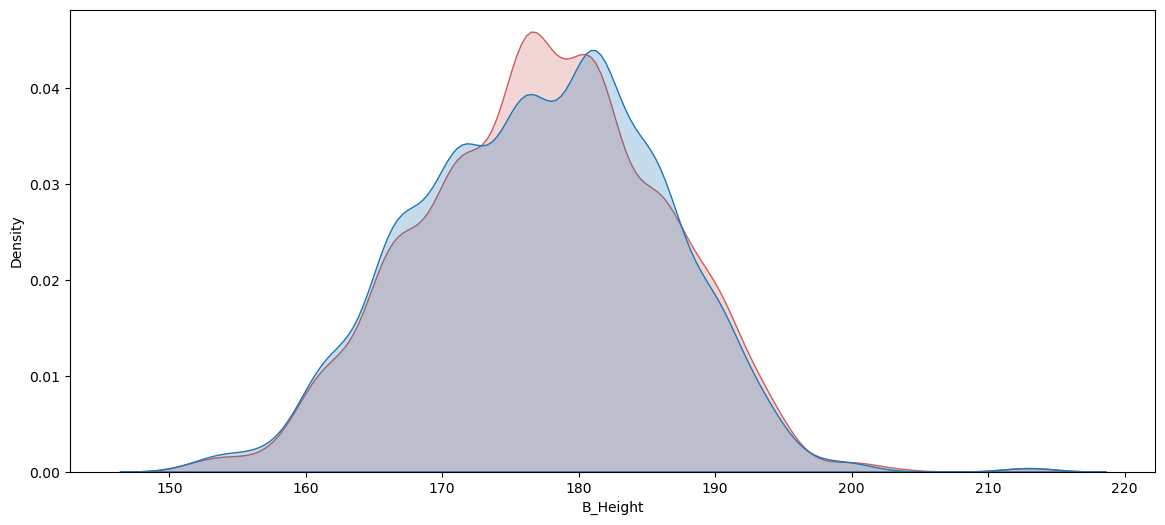

In [40]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.kdeplot(df.B_Height, shade=True, color='indianred', label='Red')
sns.kdeplot(df.R_Height, shade=True, label='Blue')

In [46]:
df['Height Difference'] = df.B_Height - df.R_Height
df[['Height Difference', 'winner']].groupby('winner').mean()

,Height Difference
winner,
blue,0.304305
draw,2.437500
no contest,-0.172334
red,0.089707


The taller fighter generally has an advantage and, statistically, wins more often. let’s see the different ways a fighter can win in an MMA match. 

There are three main outcomes:

**1. DEC (Decision):**  
A Decision happens when the fight goes the distance and doesn't end with a knockout. Instead, the judges score the fight based on how well each fighter performed. The winner is the one with the most points according to the judges. There are three possible results in a Decision:
   - **Win:** One fighter is declared the winner because they scored higher.
   - **Draw:** If both fighters are judged equally, the result is a draw.
   - **No Decision (ND):** Sometimes, a fight can’t have a winner, for example, due to an injury or a rule violation. This means no one wins.

**2. SUB (Submission):**  
A submission occurs when one fighter forces the other to give up. This usually happens when a fighter locks their opponent in a painful position, like a joint lock or choke, and the opponent taps out to signal they can't continue. “Tapping out” means the fighter is admitting defeat to avoid injury. This can be done by tapping the opponent, the mat, or sometimes using the foot to tap.

**3. KO/TKO (Knockout/Technical Knockout):**  
A Knockout (KO) happens when a fighter is knocked unconscious by a strike, meaning they are completely unable to continue fighting. The fighter falls from a standing position to the ground, completely knocked out.
   - **Technical Knockout (TKO):** This happens when a fighter is still conscious but is unable to defend themselves because they’re being overwhelmed by strikes or damage. In this case, the referee steps in to stop the fight before the fighter gets seriously hurt. The referee may call it a TKO to protect the fighter from further damage.

In simple terms, a Decision is when the judges decide who won, a Submission is when one fighter gives up, and a Knockout (KO) or Technical Knockout (TKO) is when the fighter can't continue due to physical damage.

In [50]:
temp = df["winby"].value_counts()

fig = go.Figure(data=[go.Pie(
    values=temp.values,
    labels=temp.index,
    hole=0.6,
    textinfo="percent+label",  # You can adjust this if you want more info
    hoverinfo="label+percent",
)])

fig.update_layout(
    title="How Fighters Win",
    annotations=[{
        'font': {'size': 20},
        'showarrow': False,
        'text': 'Win by',
        'x': 0.5,
        'y': 0.5
    }]
)
fig.show()


In most fights, the outcome is decided by the judges, meaning the fighters go the distance without a clear knockout. The second most common ways fights end are through Knockouts (KO) and Technical Knockouts (TKO), where one fighter is either knocked out or deemed unable to continue due to injury or other factors. Now, let’s take a closer look at how these outcomes vary depending on the age of the 'Red' fighters. This will help us understand if age has an impact on how the fights are decided.

In [54]:
fig = px.histogram(df, x='R_Age', color='winby', facet_col='winby', nbins=20)
fig.show()

MMA is a unique sport because it’s the only one where a fighter can both attack and defend at the same time. When you strike your opponent, you take a risk because it leaves you open to counterattacks. However, *the greater the risk, the greater the reward*. In simple terms, the more times you try to attack, the more chances you have to land a successful hit on your opponent. If you have the right skills and power behind your strikes, this increases your chances of winning the fight.

let’s see if making more offensive moves actually leads to better outcomes in a fight.

In [113]:
import plotly.express as px

# Assuming 'df' is the DataFrame you're working with
fig = px.scatter(df, 
                 x="B__Round1_Strikes_Body Significant Strikes_Attempts", 
                 y="B__Round1_Strikes_Body Significant Strikes_Landed", 
                 color="winner", 
                 facet_col="winner", 
                 facet_col_wrap=2,
                 title="Significant Strikes Attempted vs. Landed by Winner")


# Update all facets to show only one x-axis and one y-axis label
# fig.update_xaxes(showticklabels=True)  # Show x-axis labels only on the bottom-most row
# fig.update_yaxes(showticklabels=True)  # Show y-axis labels only on the left-most column

# Hide the x and y axis labels on all other facets
fig.update_xaxes(showticklabels=False, row=1, col=2)  # Hides x-axis label for 2nd facet
fig.update_xaxes(showticklabels=False, row=2, col=1)  # Hides x-axis label for 3rd facet
fig.update_xaxes(showticklabels=False, row=2, col=2)  # Hides x-axis label for 4th facet

fig.update_yaxes(showticklabels=False, row=2, col=1)  # Hides y-axis label for 3rd facet
fig.update_yaxes(showticklabels=False, row=2, col=2)  # Hides y-axis label for 4th facet

# Show the plot
fig.show()


The relationship between the number of attempts and the strikes that land is exactly what we expected is perfectly linear. This means that as the number of attempts goes up, the number of successful strikes increases in a consistent, predictable way.

Lets find out which countries are the most popular based on the data we have.

In [117]:
cnt_srs = df['R_Location'].value_counts().head(15)

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale='Viridis',  # You can change the colorscale as per your preference
    ),
)

layout = go.Layout(
    title='Top 15 Cities with Most Red Fighters',
    xaxis=dict(title='City'),
    yaxis=dict(title='Number of Fighters'),
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename="Top_15_Cities_with_Most_Red_Fighters.html")

MMA (Mixed Martial Arts) seems to be most popular in two countries: Brazil and the USA. In Brazil, it's actually the second most popular sport after soccer. This might be because Brazilian Jiu-Jitsu, a type of martial art that focuses on ground fighting, has a big influence in the country, and many MMA fighters come from this background.

Now, let's take a closer look at some key aspects of the fight. We’ll examine grappling reversals, grappling stand-ups, and takedowns. These are all important techniques in MMA, where a fighter either changes position or tries to take control of the other fighter. We’ll look at how these techniques play out in **Round 1**, and how they vary across different weight classes in the sport.

In [121]:
r1 = df[['B_Weight', 'B__Round1_Grappling_Reversals_Landed', 'B__Round1_Grappling_Standups_Landed', 
         'B__Round1_Grappling_Takedowns_Landed']].groupby('B_Weight').sum()
fig = px.line(r1, x=r1.index, y=r1.columns, 
              labels={'x': 'B_Weight', 'value': 'Values'}, 
              title='Sum of Grappling Stats by Weight Class')
fig.show()

There weren't many grappling reversals, but there were a lot of successful grappling takedowns. Looking at the weight classes between 70 and 80 kilograms, fighters in these divisions typically prefer to go for takedowns during the first round.

Lets focuse on Round 5, we will compare if the trend changes, and see if fighters still prefer takedowns or if there is a different strategy at play by the final round.

In [124]:
fig = px.line(r5, x=r5.index, y=r5.columns, title="Round 5 Grappling Stats by Weight Class")
fig.update_layout(xaxis_title="Weight Class", yaxis_title="Sum of Stats")
fig.show()

Interestingly, we see that fighters in the 80-90 kg weight range experience more reversals during their fights. However, fighters in the lighter weight classes seem to have fewer takedowns.

Now, look at the first round, focusing on different types of strikes: Clinch head strikes, Clinch leg strikes, and Body strikes. We’ll explore how these strikes compare across various weight classes.

In [128]:
clin_r1 = df[['B_Weight', 'B__Round1_Strikes_Clinch Head Strikes_Landed', 
              'B__Round1_Strikes_Clinch Leg Strikes_Landed', 
              'B__Round1_Strikes_Clinch Body Strikes_Landed']].groupby('B_Weight').sum()


fig = px.line(clin_r1, 
              x=clin_r1.index, 
              y=clin_r1.columns, 
              title='Clinch Strikes by Weight', 
              labels={'value': 'Strikes Landed', 'B_Weight': 'Weight Class'})
fig.update_layout(width=1200, height=600)
fig.show()

Fighters usually land more head strikes in Round 1, likely because they're full of energy and focused on getting an early advantage. Let's take a look at how this changes by Round 5, when fighters might be more fatigued and their strategies could shift.

In [132]:
clin_r5 = df[['B_Weight', 'B__Round1_Strikes_Clinch Head Strikes_Landed', 
              'B__Round5_Strikes_Clinch Leg Strikes_Landed', 
              'B__Round5_Strikes_Clinch Body Strikes_Landed']].groupby('B_Weight').sum()

fig = px.line(clin_r5, x=clin_r5.index, y=clin_r5.columns, 
              title='Clinch Strikes by Weight Class', 
              labels={'value': 'Strikes Landed', 'B_Weight': 'Weight Class'})
fig.update_layout(width=800, height=600)
fig.show()

By Round 5, the fighters are tired and worn out, so they have a hard time landing strikes to the legs and body. However, they are still landing a good number of punches to the head. This makes sense because, with the fight almost over, they know they can’t rely on the judges’ decision. Instead, they’re pushing harder for a knockout, hoping to end the fight decisively with a strong blow to the head. At this point, they’re focused on getting the finish rather than continuing with the usual strategy.